In [11]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
raw_data = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
Suburb           63023 non-null object
Address          63023 non-null object
Rooms            63023 non-null int64
Type             63023 non-null object
Price            48433 non-null float64
Method           63023 non-null object
SellerG          63023 non-null object
Date             63023 non-null object
Postcode         63023 non-null int64
Regionname       63023 non-null object
Propertycount    63023 non-null int64
Distance         63023 non-null float64
CouncilArea      63023 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [14]:
# Drop columns such as Address that really do not play any role in the price of the house

columns_to_drop = ['Address', 'SellerG', 'Postcode', 'Method', 'Regionname', 'CouncilArea', 'Type', 'Date']
raw_data.drop(columns_to_drop, axis=1, inplace=True)

In [15]:
# Looking at the data we can model the housing prices with the following linear equation:
#
#   Housing Price = function(Suburb, Rooms, Propertycount, Distance)
#
# Distance ----> because the farther away from CBD the price will be less
# Propertycount -----> because the more number of unsold properties the price will be lower
# But, Distance and Propertycount can be treated as a categorical data
#

# Columns to keep:
#     Suburb - converted to numeric with dummies
#     Rooms
#     Price
#     Propertycount
#     Distance


# Rows with NaN must be dropped, as they may give skewed results, especially in the Price column

In [16]:
raw_data['Suburb'] = raw_data['Suburb'].astype(str)
suburb = pd.get_dummies(raw_data.Suburb)
raw_data.drop(['Suburb'], inplace=True, axis=1)
raw_data = pd.concat([raw_data, suburb], axis=1)
raw_data.drop(raw_data.columns[0], axis=1, inplace=True)

In [17]:
# Fill any NaN values to zeros

raw_data.fillna(0, inplace=True)

In [18]:
# Create our feature set and label data

# Try first with 10,000 rows of X and Y as I am running out of capacity on my local machine

X = raw_data.drop(['Price'], axis=1).head(10000)
y = raw_data['Price'].head(10000)

In [19]:
from sklearn.model_selection import train_test_split

# test_size: The split between test and train is 75-25 approximately

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

In [27]:
from sklearn import linear_model

# Fit Lasso regression model

regr = linear_model.Lasso(alpha=0.6, copy_X=True, fit_intercept=True, max_iter=30000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

regr.fit(X_train, y_train)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_train, y_train))


Coefficients: 
 [-4.38912661e+00 -1.13954698e+04 -2.40961953e+04  3.85673084e+05
 -3.83916448e+04 -6.18043833e+05  5.46223905e+05 -1.37281021e+05
  5.90061925e+05  1.19480138e+05 -1.70465775e+05 -1.66339615e+05
 -1.64497544e+05  4.23701914e+05  8.94479469e+04  5.85123568e+05
  5.91443721e+04  7.41237988e+04  3.58157050e+05 -2.02247064e+05
 -6.69523969e+04  0.00000000e+00  0.00000000e+00  1.69372347e+05
  6.82373357e+05  4.37111823e+05  1.45368440e+04 -2.31862671e+05
  1.40343403e+05  0.00000000e+00  6.28272550e+05  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.96853532e+05  3.30225443e+05
  1.79553308e+05  9.62035156e+04  4.88849947e+05  3.35179602e+05
  2.01927559e+05  2.21181985e+04  5.42610036e+04 -2.16774417e+04
  0.00000000e+00  2.00920616e+05 -2.01957579e+05  4.03036556e+03
  5.61719642e+05  3.30237586e+05 -2.59104097e+05  0.00000000e+00
 -3.06162015e+05  9.04698703e+04 -3.43546949e+04 -1.23633264e+05
  0.00000000e+00  2.87712749e+05  0.00000000e+00 -1.70946740e+05
  3.1320

In [29]:
# Predict values for training data set

predict_train = regr.predict(X_train)

# Residual values on training set

residual_train = y_train - predict_train

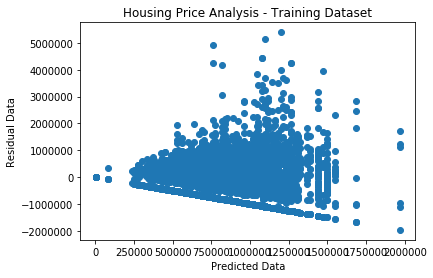

In [34]:
# Plot original and predicted values on training dataset

plt.xlabel('Predicted Data')
plt.ylabel('Residual Data')
plt.title('Housing Price Analysis - Training Dataset')
plt.scatter(predict_train, residual_train)

In [31]:
# Predict on test data

predict_test = regr.predict(X_test)

# Residual on test set
residual_test = y_test - predict_test

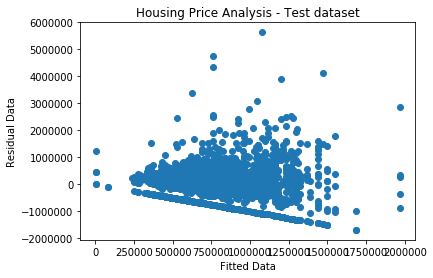

In [33]:
# Plot original and predicted values for test set

plt.xlabel('Fitted Data')
plt.ylabel('Residual Data')
plt.title('Housing Price Analysis - Test dataset')
plt.scatter(predict_test, residual_test)

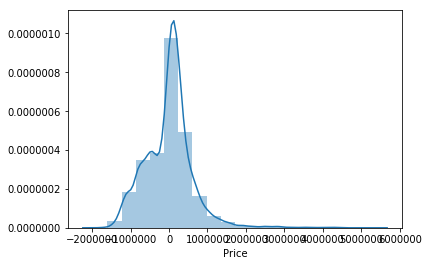

In [40]:
sns.distplot((y_train-predict_train),bins=20)

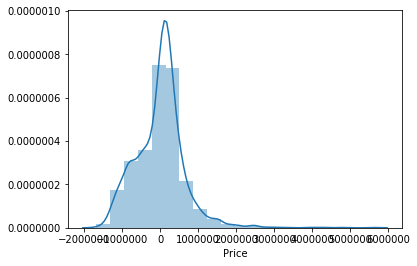

In [41]:
sns.distplot((y_test-predict_test),bins=20)